In [33]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

### Task #1: Merging 12 csvs into a single dataframe

In [5]:
# This code lists the 12 months of sales data in CSV format located in the 'Sales_Data' directory.
files = [file for file in os.listdir('./Sales_Data')] 

# Create an empty DataFrame to store aggregated sales data for all months.
all_months_data = pd.DataFrame()

# Performing a for loop through the list of files in the './Sales_Data' directory.
for file in files:
    file_path = os.path.join('./Sales_Data', file)  # Naming the file resulting from merging the 12-month dataset into one.
    df = pd.read_csv(file_path)  # Reading the merged data from the 12-month dataset.
    all_months_data = pd.concat([all_months_data, df])  # Appending the merged data to the 'all_data' variable.

# Saving all the data from the 'all_months_data' DataFrame to the "all_data.csv" CSV file without an index,
# to keep the CSV file clean without the need for an index when reading the data.
all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [34]:
all_data = pd.read_csv("all_data.csv") 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the Data

#### Check Missing Value

In [35]:
all_data.isnull().sum()# let's check the nan value

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### drop nan

In [36]:
# Check the nan value by finding rows with missing values in the 'all_data' DataFrame.
nan_df = all_data[all_data.isna().any(axis=1)] 
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Removing rows with all missing values (NaN) in the 'all_data' DataFrame, since NaN is located in entire rows.
all_data = all_data.dropna(how='all')

# to make sure the missing value, I use this function
all_data.isna().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Find 'Or' and delete it

In [38]:
# Filtering rows in the 'all_data' DataFrame with 'Order Date' not starting with 'Or',
# to address the 'Or' issue causing errors when converting the data type of the 'Month' column.
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to the correct type

In [39]:
# Convert data to integer type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) 
# Convert data to float type
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
# To ensure data can be properly operated on.

### Task #2: Add a Month colum

In [40]:
# Adding a 'Month' column by extracting the first two digits from the 'Order Date' column.
all_data['Month'] = all_data['Order Date'].str[0:2]

# Converting the data type of the 'Month' column to integer (int32) 
# because the 'Month' data column contains numeric values.
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


 ### Augment data with additional columns

### Task #3: Add a sales column

In [41]:
# Creating a new column named 'Sales' using a basic mathematical formula.
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Question #1: What was the best month for sales?

In [42]:
# Since we have a sales column, we can now group the data by month and calculate the sum.
results = all_data.groupby('Month').sum()
results


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


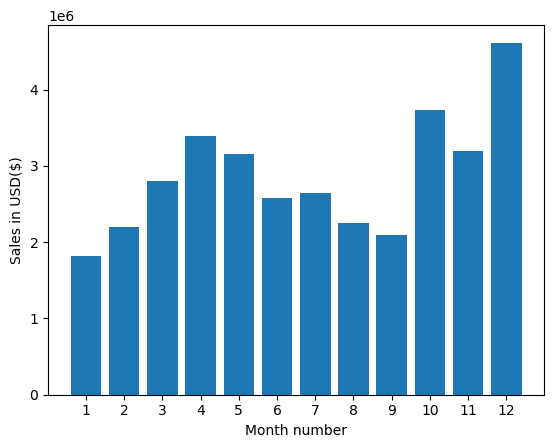

In [43]:
import matplotlib.pyplot as plt
# Visualizing the data for easier analysis.

months = range(1, 13)  # Creating a list of months from 1 to 12.

plt.bar(months, results['Sales'])  # Creating a bar plot for sales data.
plt.xticks(months)  # Setting X-axis labels to clarify the relationship between Sales and Month on the graph.
plt.ylabel('Sales in USD($)') 
plt.xlabel('Month number')
plt.show()

##### Answer: The best month for sales was in month 12, which I determined from the data and visualization above.

### Question #2: What city sold the most product?

In [44]:
# Creating the 'City' column
def get_city(address):
    return address.split(',')[1] # The city name is at index 1 because the address is split into three parts by a comma(,).

# Creating the 'State' column
def get_state(address):
    return address.split(',')[2].split(' ')[1] # Similar to the above, but this extracts state abbreviations as many states have duplicate city names.

# Applying the city and state extraction functions to create the 'City' column.
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Add City Column

In [45]:
# With the presence of a 'Sales' column, we can proceed to group the data by 'City' and obtain the results.
Results = all_data.groupby('City').sum()
Results


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


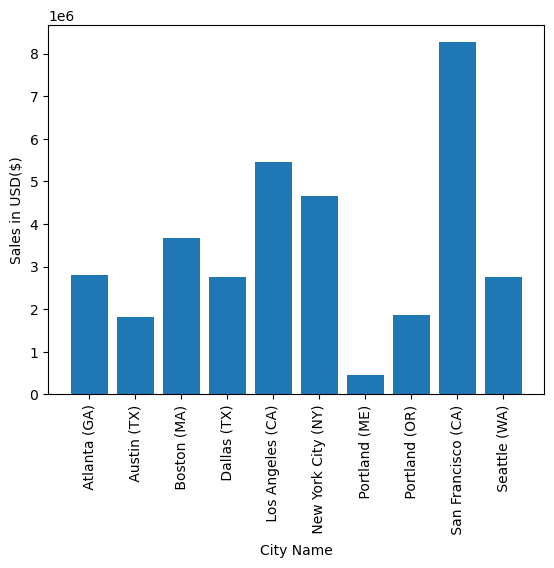

In [46]:
# cities = all_data['City'].unique()
# The above code is not reliable because the order of cities (X data) and sales data (Y data)
# is not in the same order. Therefore, adjustment is needed to align the city order with sales results.
# To achieve this, use the following code to arrange cities according to sales results.

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, Results['Sales'])
plt.xticks(cities, rotation='vertical', size=10)  # Setting X-axis labels with vertical rotation and font size 10
plt.ylabel('Sales in USD($)')
plt.xlabel('City Name')
plt.show()


#### Answer: From the data and visualization above, the city that sold the most was San Francisco, based on the total sales in USD($).

### Question #3: What time should we display advertisements to maximize the likelihood of purchases? 

In [47]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])#change the format order date
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [48]:
# Extracting the hour and minute components from the 'Order Date' to enhance the analysis of the optimal advertising times.
all_data['Hour'] = all_data['Order Date'].dt.hour  # Creating a new 'Hour' column with the hour of the order timestamp.
all_data['Minute'] = all_data['Order Date'].dt.minute  # Creating a new 'Minute' column with the minute of the order timestamp.

# The DataFrame now includes the 'Hour' and 'Minute' columns for further analysis.
all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30


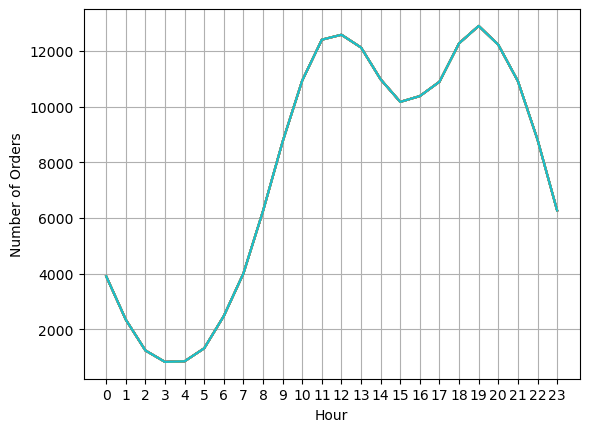

In [49]:
#visualization
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.grid()
plt.show()


#### Answer: From the visualization above, I would recommend displaying advertisements at 11 AM (11:00) and 7 AM (07:00) to maximize the likelihood of purchases. These times are suggested because they coincide with potentially high viewer engagement when people are actively watching, which can lead to increased chances of purchase.

### Question4: What products are most often sold together?

In [50]:
# Selecting data with duplicate 'Order ID' values to identify frequently sold products.
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Grouping products sold together into a single row, using 'Order ID' as the reference.
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Removing duplicate rows based on 'Order ID' and storing the result in the 'df' DataFrame.
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [51]:
# Counting frequently co-purchased product pairs by calculating unique product combinations within 'Grouped' and their frequencies.
# Reference: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations  # Library for generating combinations
from collections import Counter  # Library for counting frequencies

count = Counter()  # Initializing a Counter object

for row in df['Grouped']:
    row_list = row.split(',')  # Splitting the products in each group into a list
    count.update(Counter(combinations(row_list, 2)))  # Counting unique product combinations within the group
    # In this context, we are identifying unique pairs of products frequently purchased together, which can be customized as needed.

for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Answer: From the results above, the product pair that customers most frequently purchase together consists of iPhoneand Lightning Charging Cable

### Question #5: What product sold the most? Why do you think it did?

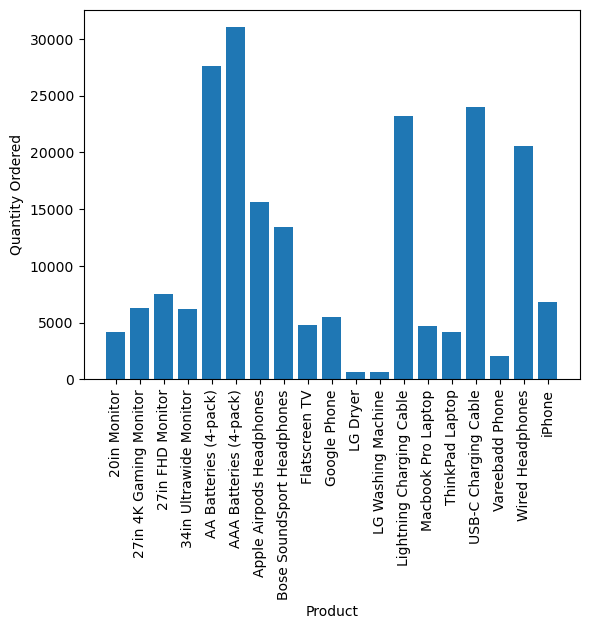

In [52]:
# Visualizing the best-selling products by grouping data based on the products, calculating the total quantity ordered,
# and displaying a bar chart.
product_group = all_data.groupby('Product')  # Grouping the data by product

quantity_ordered = product_group.sum()['Quantity Ordered']  # Calculating the total quantity ordered for each product

products = [product for product, df in product_group]  # Creating a list of products
# Displaying a bar chart with products on the X-axis and total quantity ordered on the Y-axis
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=10)  # Adjusting product labels for better visibility
plt.show()


In [35]:
# The purpose of using this data is to overlay it onto the visualization chart above as an additional secondary Y-axis.
# It contains the mean prices of each product.
prices = all_data.groupby('Product').mean()['Price Each']

print(prices)


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


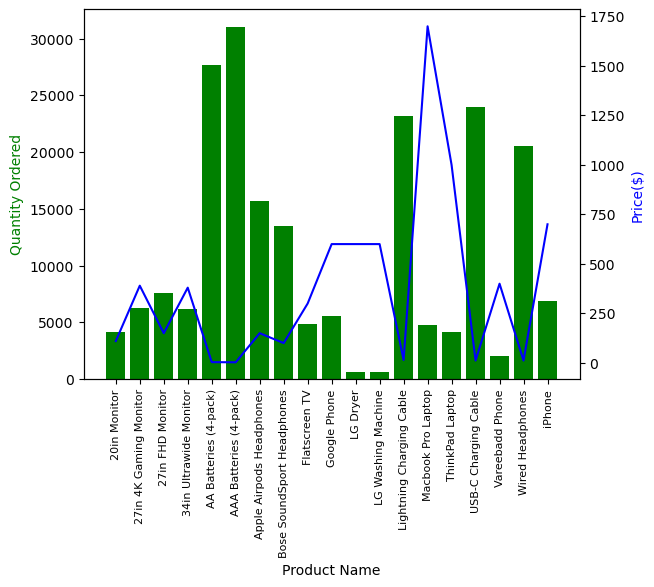

In [53]:
# Calculating the mean prices for each product and storing the result in 'prices.'
prices = all_data.groupby('Product').mean()['Price Each']

# Creating a figure and two axes for the dual-axis chart.
fig, ax1 = plt.subplots()

# Creating a secondary Y-axis ('ax2') that shares the same X-axis ('ax1').
ax2 = ax1.twinx()

# Plotting the quantity ordered (green bars) on the primary Y-axis ('ax1').
ax1.bar(products, quantity_ordered, color='g')

# Plotting the mean prices (blue line) on the secondary Y-axis ('ax2').
ax2.plot(products, prices, 'b')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')

# Setting the Y-axis label for 'Price($)' with blue color on the secondary Y-axis ('ax2').
ax2.set_ylabel('Price($)', color='b')

# Adjusting the product labels for better visibility on the X-axis by rotating them vertically with a font size of 8.
ax1.set_xticklabels(products, rotation='vertical', size=8)

# Displaying the dual-axis chart.
plt.show()


#### Answer: From the visualization above, it is evident that the product with the highest quantity of orders is the 'AAA Batteries (4-pack).' However, when considering profitability, the 'Macbook Pro Laptop' stands out as the top revenue generator, while the 'AAA Batteries (4-pack)' yields the lowest profit. This discrepancy can be attributed to the significantly higher price of the Macbook Pro Laptop compared to the relatively lower-priced AAA Batteries (4-pack).